# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
# tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

True

In [7]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [8]:
tf.reset_default_graph()

In [9]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 30
env_name = 'Cross'  # Choose one of the environments shown above. 
resize_factor = 5  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/blbudima/miniconda3/envs/sgm/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [10]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 991/30000 [00:12<04:27, 108.41it/s]

Saved checkpoint for step 1000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.787697
INFO:tensorflow:84.936 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.10
INFO:tensorflow:		 predicted_dist = 20.9 (0.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -30.00
INFO:tensorflow:		 predicted_dist = 21.5 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 22.0 (0.5)
INFO:tensorflow:	 eval_time = 4.47


  7%|▋         | 1997/30000 [00:27<05:11, 90.01it/s]  

Saved checkpoint for step 2000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.113221
INFO:tensorflow:110.381 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -25.00
INFO:tensorflow:		 predicted_dist = 23.0 (3.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -21.70
INFO:tensorflow:		 predicted_dist = 25.3 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 25.9 (2.0)
INFO:tensorflow:	 eval_time = 3.99


 10%|▉         | 2996/30000 [00:42<04:21, 103.21it/s] 

Saved checkpoint for step 3000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 1.361494
INFO:tensorflow:105.732 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -24.60
INFO:tensorflow:		 predicted_dist = 24.3 (3.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -27.70
INFO:tensorflow:		 predicted_dist = 25.8 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 27.0 (0.8)
INFO:tensorflow:	 eval_time = 3.53


 13%|█▎        | 3990/30000 [00:55<04:09, 104.28it/s]

Saved checkpoint for step 4000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.161337
INFO:tensorflow:119.244 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -27.10
INFO:tensorflow:		 predicted_dist = 26.0 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -28.00
INFO:tensorflow:		 predicted_dist = 26.6 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -30.00
INFO:tensorflow:		 predicted_dist = 27.2 (0.8)
INFO:tensorflow:	 eval_time = 3.76


 17%|█▋        | 4994/30000 [01:09<03:57, 105.16it/s]

Saved checkpoint for step 5000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 1.107776
INFO:tensorflow:114.785 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.10
INFO:tensorflow:		 predicted_dist = 23.8 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -23.90
INFO:tensorflow:		 predicted_dist = 26.7 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -28.50
INFO:tensorflow:		 predicted_dist = 27.7 (0.7)
INFO:tensorflow:	 eval_time = 3.28


 20%|█▉        | 5991/30000 [01:21<03:43, 107.54it/s]

Saved checkpoint for step 6000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 1.591464
INFO:tensorflow:121.863 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -15.20
INFO:tensorflow:		 predicted_dist = 20.4 (3.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -19.80
INFO:tensorflow:		 predicted_dist = 24.9 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.00
INFO:tensorflow:		 predicted_dist = 27.6 (0.7)
INFO:tensorflow:	 eval_time = 3.03


 23%|██▎       | 6997/30000 [01:35<04:01, 95.41it/s] 

Saved checkpoint for step 7000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 2.297330
INFO:tensorflow:108.528 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.30
INFO:tensorflow:		 predicted_dist = 18.8 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.50
INFO:tensorflow:		 predicted_dist = 23.9 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -27.10
INFO:tensorflow:		 predicted_dist = 26.4 (0.9)
INFO:tensorflow:	 eval_time = 2.83


 27%|██▋       | 7999/30000 [01:48<05:24, 67.70it/s] 

Saved checkpoint for step 8000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 2.417232
INFO:tensorflow:114.638 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.00
INFO:tensorflow:		 predicted_dist = 16.2 (2.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.60
INFO:tensorflow:		 predicted_dist = 22.1 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -26.30
INFO:tensorflow:		 predicted_dist = 24.6 (1.9)
INFO:tensorflow:	 eval_time = 2.99


 30%|██▉       | 8991/30000 [02:01<03:19, 105.15it/s]

Saved checkpoint for step 9000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 2.721125
INFO:tensorflow:110.482 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.90
INFO:tensorflow:		 predicted_dist = 13.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.10
INFO:tensorflow:		 predicted_dist = 18.2 (2.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -21.30
INFO:tensorflow:		 predicted_dist = 21.9 (1.8)
INFO:tensorflow:	 eval_time = 2.24


 33%|███▎      | 9997/30000 [02:13<03:20, 99.61it/s] 

Saved checkpoint for step 10000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 2.973802
INFO:tensorflow:117.259 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 9.5 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.30
INFO:tensorflow:		 predicted_dist = 14.8 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -22.00
INFO:tensorflow:		 predicted_dist = 19.4 (2.2)
INFO:tensorflow:	 eval_time = 2.60


 37%|███▋      | 10998/30000 [02:26<03:23, 93.52it/s] 

Saved checkpoint for step 11000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 3.279821
INFO:tensorflow:109.969 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 7.4 (3.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 14.1 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 18.2 (2.2)
INFO:tensorflow:	 eval_time = 2.06


 40%|███▉      | 11993/30000 [02:38<02:55, 102.74it/s]

Saved checkpoint for step 12000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 3.170595
INFO:tensorflow:115.777 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 7.8 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.30
INFO:tensorflow:		 predicted_dist = 12.4 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.90
INFO:tensorflow:		 predicted_dist = 14.8 (2.5)
INFO:tensorflow:	 eval_time = 2.13


 43%|████▎     | 12996/30000 [02:50<02:42, 104.41it/s]

Saved checkpoint for step 13000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.990664
INFO:tensorflow:117.719 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 6.8 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.50
INFO:tensorflow:		 predicted_dist = 9.7 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.80
INFO:tensorflow:		 predicted_dist = 13.7 (2.5)
INFO:tensorflow:	 eval_time = 2.27


 47%|████▋     | 13993/30000 [03:02<02:39, 100.57it/s]

Saved checkpoint for step 14000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 3.512023
INFO:tensorflow:118.181 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 6.5 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.50
INFO:tensorflow:		 predicted_dist = 9.0 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.00
INFO:tensorflow:		 predicted_dist = 12.8 (2.2)
INFO:tensorflow:	 eval_time = 2.16


 50%|████▉     | 14999/30000 [03:14<03:26, 72.63it/s] 

Saved checkpoint for step 15000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 3.444455
INFO:tensorflow:111.527 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.40
INFO:tensorflow:		 predicted_dist = 7.2 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.60
INFO:tensorflow:		 predicted_dist = 11.2 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.60
INFO:tensorflow:		 predicted_dist = 14.0 (1.9)
INFO:tensorflow:	 eval_time = 2.21


 53%|█████▎    | 15990/30000 [03:26<02:12, 106.04it/s]

Saved checkpoint for step 16000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 4.139592
INFO:tensorflow:118.467 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.80
INFO:tensorflow:		 predicted_dist = 6.7 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 9.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.40
INFO:tensorflow:		 predicted_dist = 14.4 (2.5)
INFO:tensorflow:	 eval_time = 2.20


 57%|█████▋    | 16992/30000 [03:38<02:02, 106.37it/s]

Saved checkpoint for step 17000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 3.395173
INFO:tensorflow:116.697 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 4.9 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.00
INFO:tensorflow:		 predicted_dist = 7.9 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.50
INFO:tensorflow:		 predicted_dist = 13.2 (2.9)
INFO:tensorflow:	 eval_time = 2.03


 60%|█████▉    | 17991/30000 [03:50<01:53, 105.35it/s]

Saved checkpoint for step 18000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 3.542007
INFO:tensorflow:113.298 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 5.0 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 8.5 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 11.7 (1.2)
INFO:tensorflow:	 eval_time = 2.34


 63%|██████▎   | 18999/30000 [04:03<02:37, 69.68it/s] 

Saved checkpoint for step 19000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 3.650801
INFO:tensorflow:116.528 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 5.0 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 9.1 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.80
INFO:tensorflow:		 predicted_dist = 13.3 (2.6)
INFO:tensorflow:	 eval_time = 1.97


 67%|██████▋   | 19999/30000 [04:14<02:08, 78.13it/s] 

Saved checkpoint for step 20000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 3.198367
INFO:tensorflow:116.650 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 5.3 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.70
INFO:tensorflow:		 predicted_dist = 10.1 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.80
INFO:tensorflow:		 predicted_dist = 15.5 (3.5)
INFO:tensorflow:	 eval_time = 2.29


 70%|██████▉   | 20992/30000 [04:26<01:26, 104.71it/s]

Saved checkpoint for step 21000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.571597
INFO:tensorflow:118.121 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.70
INFO:tensorflow:		 predicted_dist = 5.8 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 10.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.20
INFO:tensorflow:		 predicted_dist = 14.5 (2.7)
INFO:tensorflow:	 eval_time = 2.17


 73%|███████▎  | 21991/30000 [04:38<01:19, 100.77it/s]

Saved checkpoint for step 22000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 3.341967
INFO:tensorflow:115.280 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 5.4 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 9.2 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.9 (2.3)
INFO:tensorflow:	 eval_time = 2.19


 77%|███████▋  | 22994/30000 [04:50<01:06, 105.41it/s]

Saved checkpoint for step 23000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 3.716940
INFO:tensorflow:116.513 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 6.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.00
INFO:tensorflow:		 predicted_dist = 9.3 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.1 (2.4)
INFO:tensorflow:	 eval_time = 2.10


 80%|███████▉  | 23994/30000 [05:02<00:59, 100.88it/s]

Saved checkpoint for step 24000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 3.665648
INFO:tensorflow:120.974 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 4.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 8.7 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 13.5 (3.1)
INFO:tensorflow:	 eval_time = 2.44


 83%|████████▎ | 24999/30000 [05:14<01:04, 76.97it/s] 

Saved checkpoint for step 25000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 3.212896
INFO:tensorflow:115.637 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 6.0 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.20
INFO:tensorflow:		 predicted_dist = 8.8 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 13.8 (1.5)
INFO:tensorflow:	 eval_time = 2.21


 87%|████████▋ | 25998/30000 [05:26<00:37, 106.86it/s]

Saved checkpoint for step 26000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 3.707114
INFO:tensorflow:116.814 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 6.5 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 9.4 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.90
INFO:tensorflow:		 predicted_dist = 14.4 (1.7)
INFO:tensorflow:	 eval_time = 2.15


 90%|████████▉ | 26999/30000 [05:38<00:37, 79.56it/s] 

Saved checkpoint for step 27000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 3.254478
INFO:tensorflow:117.282 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.60
INFO:tensorflow:		 predicted_dist = 5.2 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.80
INFO:tensorflow:		 predicted_dist = 9.9 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.10
INFO:tensorflow:		 predicted_dist = 13.8 (2.3)
INFO:tensorflow:	 eval_time = 2.43


 93%|█████████▎| 27998/30000 [05:50<00:18, 107.74it/s]

Saved checkpoint for step 28000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 3.863629
INFO:tensorflow:119.204 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 6.2 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.10
INFO:tensorflow:		 predicted_dist = 8.2 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 14.4 (2.0)
INFO:tensorflow:	 eval_time = 2.14


 97%|█████████▋| 28994/30000 [06:03<00:09, 106.79it/s]

Saved checkpoint for step 29000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 3.359016
INFO:tensorflow:110.793 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 4.0 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -6.60
INFO:tensorflow:		 predicted_dist = 8.5 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.30
INFO:tensorflow:		 predicted_dist = 12.8 (1.8)
INFO:tensorflow:	 eval_time = 2.21


100%|█████████▉| 29992/30000 [06:14<00:00, 106.44it/s]

Saved checkpoint for step 30000: /home/blbudima/sgm/notebooks/../agents/thinned_cross/Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 3.260063
INFO:tensorflow:118.856 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 4.0 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.40
INFO:tensorflow:		 predicted_dist = 9.7 (2.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.30
INFO:tensorflow:		 predicted_dist = 13.7 (2.2)
INFO:tensorflow:	 eval_time = 2.22


100%|██████████| 30000/30000 [06:17<00:00, 79.50it/s] 


LossInfo(loss=<tf.Tensor: id=1149426, shape=(), dtype=float32, numpy=3.2600632>, extra=(<tf.Tensor: id=1149427, shape=(), dtype=float32, numpy=0.7506236>, <tf.Tensor: id=1149428, shape=(), dtype=float32, numpy=2.5094397>))

# Load trained model into agent

In [11]:
filename = "Cross_coordinate_30steps-May-12-2021-03-02-42-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [12]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=10)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

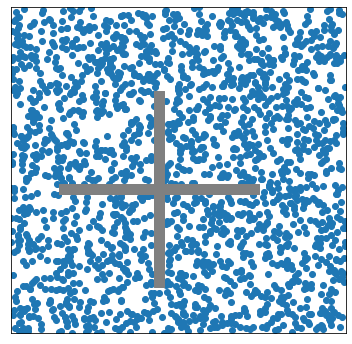

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [14]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

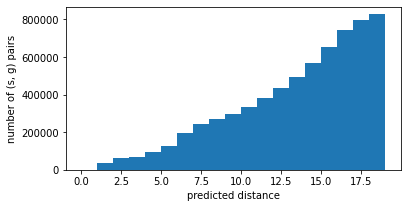

In [15]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 250 nodes and 5511 edges


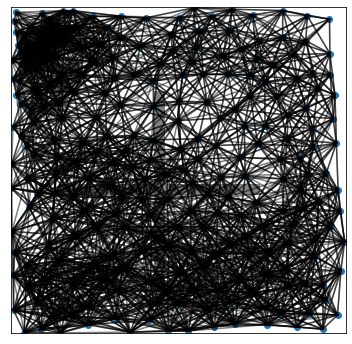

In [16]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 1243 edges


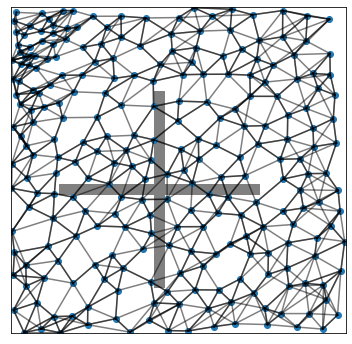

In [17]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 995 edges


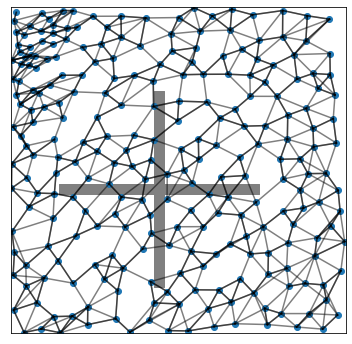

In [18]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 747 edges


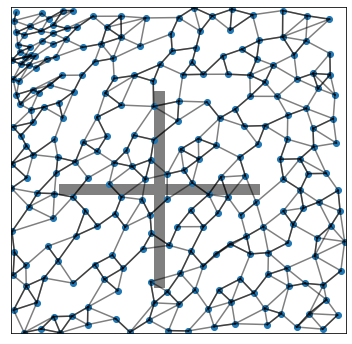

In [19]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 499 edges


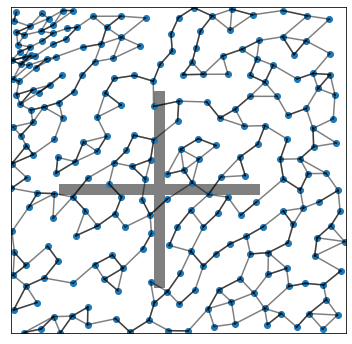

In [20]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 250 edges


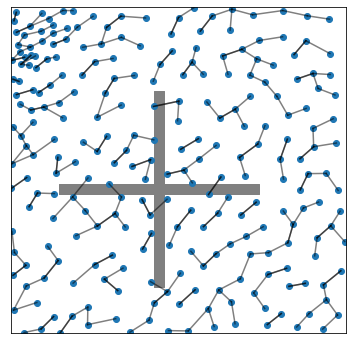

In [21]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

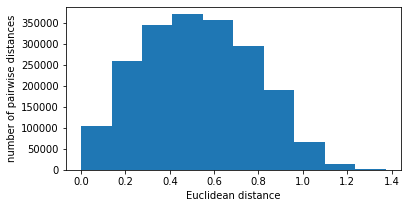

In [22]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [23]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=30) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=30)

# Cleanup and evaluate SGM

In [24]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 695.62 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.30
Took 5000 cleanup steps and evaluated SGM success rate in 1042.59 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.40
Took 5000 cleanup steps and evaluated SGM success rate in 1048.73 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.55
Took 5000 cleanup steps and evaluated SGM success rate in 1069.58 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.60
Took 5000 cleanup steps and evaluated SGM success rate in 985.68 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.50
Took 5000 cleanup steps and evaluated SGM success rate in 975.96 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.70
Took 5000 cleanup steps and evaluated SGM success rate in 867.86 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.75
Took 500

# Load cleanup graphs

In [25]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

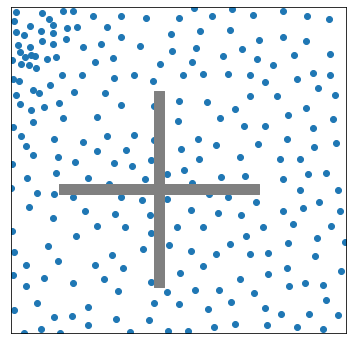

In [26]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 5511 edges


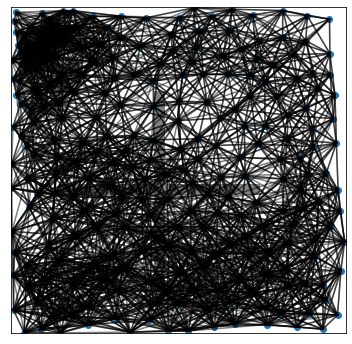

In [27]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 1243 edges


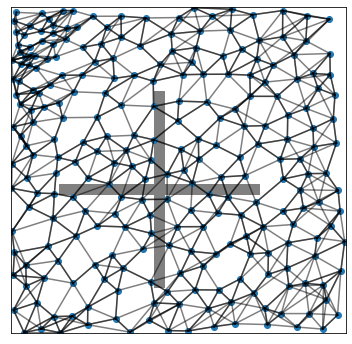

In [28]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 1131 edges


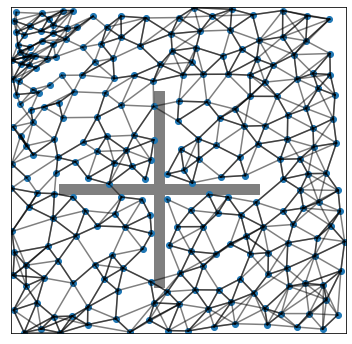

In [29]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 250 nodes and 112 edges


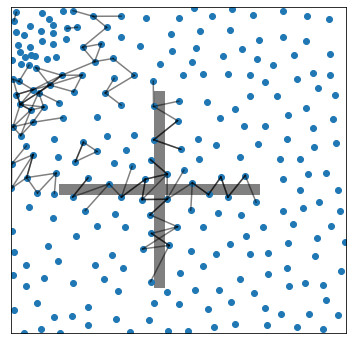

In [30]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)